## Inicio

In [2]:
import pandas as pd

# Cargar el dataset
ruta_archivo = '/content/complete_dataset.csv'
data = pd.read_csv(ruta_archivo)

# Convertir la columna 'date' a formato datetime para facilitar la agrupación
data['date'] = pd.to_datetime(data['date'])

In [3]:
# Diccionario para traducir los días de la semana
dias_traduccion = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Diccionario para traducir los meses
meses_traduccion = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

In [4]:
# Orden correcto de días de la semana y meses
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Agregar columnas adicionales para el día de la semana y el mes
data['día_semana'] = data['date'].dt.day_name().map(dias_traduccion)
data['mes'] = data['date'].dt.month_name().map(meses_traduccion)

# Convertir 'día_semana' y 'mes' a categorías con el orden específico
data['día_semana'] = pd.Categorical(data['día_semana'], categories=orden_dias, ordered=True)
data['mes'] = pd.Categorical(data['mes'], categories=orden_meses, ordered=True)

In [5]:
# Análisis independientes por día de la semana
analisis_dia = data.groupby('día_semana')['RRP'].agg(['mean', 'std', 'median', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
analisis_dia.columns = ['media', 'desviación estándar', 'mediana', 'mínimo', 'máximo', 'percentil 25', 'percentil 75']

# Análisis independientes por mes
analisis_mes = data.groupby('mes')['RRP'].agg(['mean', 'std', 'median', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
analisis_mes.columns = ['media', 'desviación estándar', 'mediana', 'mínimo', 'máximo', 'percentil 25', 'percentil 75']

# Calcular valor sugerido para un contrato
# Se toma la mediana como base y se añade un margen de un cierto porcentaje de la desviación estándar
valor_contrato_dia = analisis_dia['mediana'] + 0.1 * analisis_dia['desviación estándar']
valor_contrato_mes = analisis_mes['mediana'] + 0.1 * analisis_mes['desviación estándar']

<ipython-input-5-9d84a4d060b1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_dia = data.groupby('día_semana')['RRP'].agg(['mean', 'std', 'median', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
<ipython-input-5-9d84a4d060b1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_mes = data.groupby('mes')['RRP'].agg(['mean', 'std', 'median', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])


In [6]:
# Mostrar resultados
print("Análisis por día de la semana:\n")
print(analisis_dia)

Análisis por día de la semana:

                media  desviación estándar    mediana     mínimo       máximo  \
día_semana                                                                      
Lunes       72.477842            38.109272  68.879497  10.801519   295.829202   
Martes      74.938984            41.031396  69.387730  14.157948   278.777743   
Miércoles   78.814831            55.644604  72.138387  17.023838   624.260934   
Jueves      96.106250           274.045053  74.663055  -1.761423  4549.645105   
Viernes     89.377332           185.227514  69.841836  -6.076028  2809.437516   
Sábado      61.867345            33.575516  55.674962  -1.983471   240.954524   
Domingo     58.983380            34.288114  53.937951   6.869135   290.419644   

            percentil 25  percentil 75  
día_semana                              
Lunes          39.838938     99.851638  
Martes         42.328652    100.199341  
Miércoles      43.650345    100.775026  
Jueves         41.647543     99.9

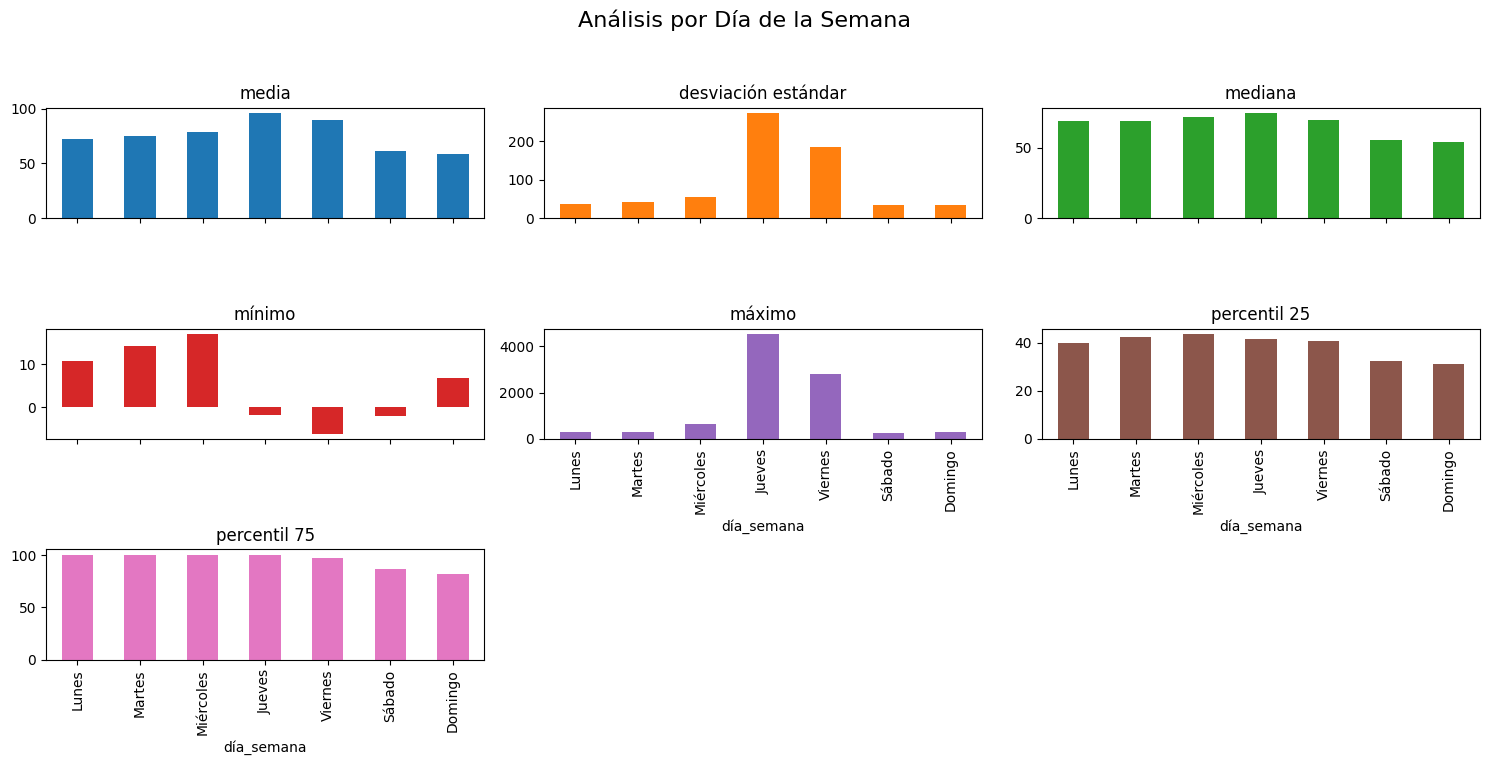

In [7]:
import matplotlib.pyplot as plt

# Graficar análisis por día de la semana
analisis_dia.plot(kind='bar', figsize=(15, 8), subplots=True, layout=(3, 3), legend=False)
plt.suptitle('Análisis por Día de la Semana', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se sobreponga
plt.show()

In [8]:
print("\nValor sugerido por contrato por día de la semana:\n")
print(valor_contrato_dia)


Valor sugerido por contrato por día de la semana:

día_semana
Lunes         72.690424
Martes        73.490869
Miércoles     77.702847
Jueves       102.067560
Viernes       88.364588
Sábado        59.032514
Domingo       57.366762
dtype: float64


In [9]:
print("\n Análisis por mes: \n")
print(analisis_mes)



 Análisis por mes: 

                 media  desviación estándar    mediana     mínimo  \
mes                                                                 
Enero       127.970679           408.323708  62.712553  -1.761423   
Febrero      70.476061            57.863335  59.457996  14.235635   
Marzo        72.450579            96.661450  57.509557  14.373099   
Abril        66.740784            34.751879  63.563245  13.563056   
Mayo         69.272424            34.838535  65.884269  10.801519   
Junio        81.245597            36.169548  85.795261  23.380385   
Julio        75.476441            33.173498  72.709715  21.091719   
Agosto       72.732320            38.296565  63.362775   9.421019   
Septiembre   68.578842            34.993445  58.833041  12.504319   
Octubre      68.515061            35.794760  70.884690  -6.076028   
Noviembre    68.229623            32.148938  71.533357  10.725642   
Diciembre    66.229981            41.016506  57.534247  14.967108   

           

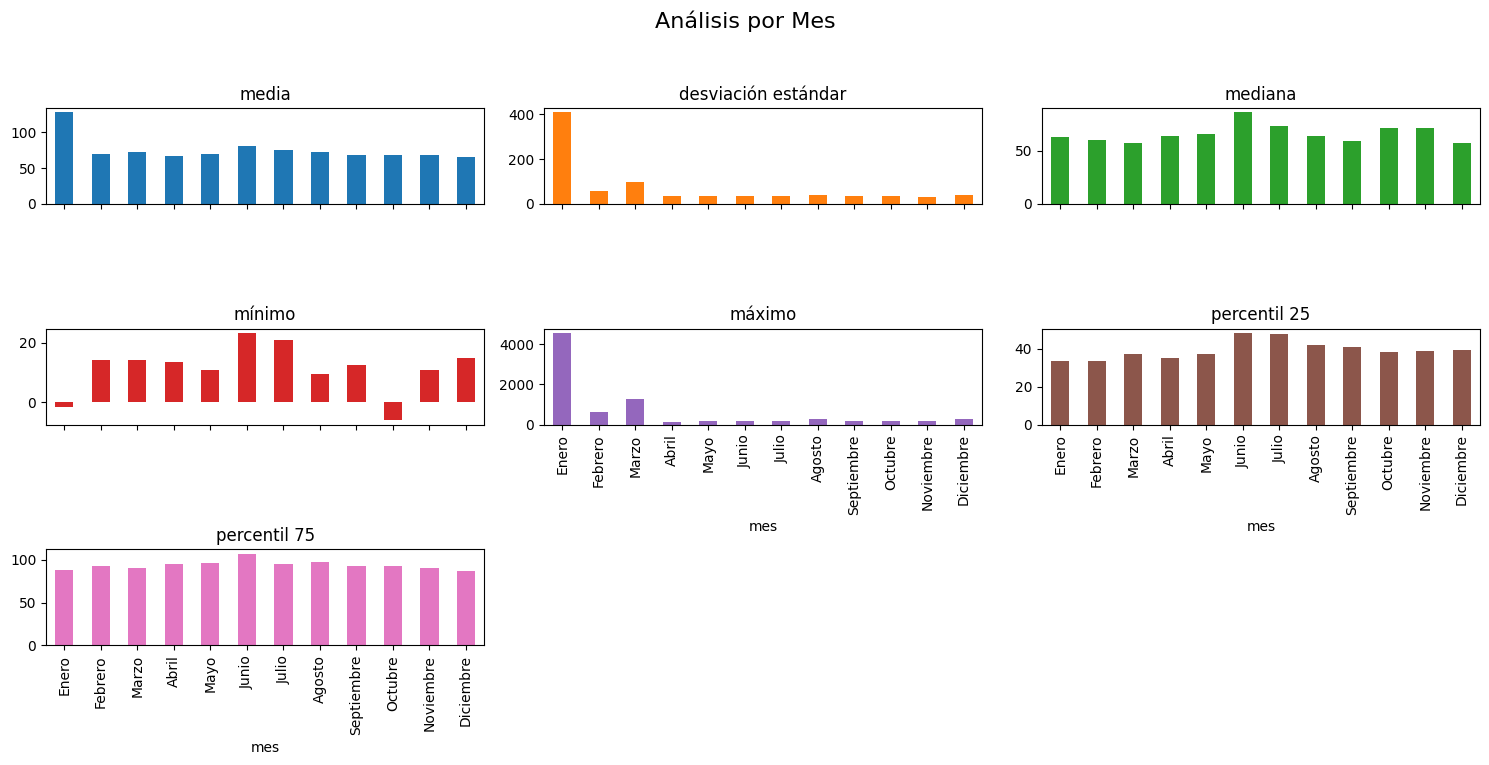

In [10]:
# Graficar análisis por mes
analisis_mes.plot(kind='bar', figsize=(15, 8), subplots=True, layout=(3, 3), legend=False)
plt.suptitle('Análisis por Mes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se sobreponga
plt.show()

In [11]:
print("\nValor sugerido por contrato por mes:\n")
print(valor_contrato_mes)


Valor sugerido por contrato por mes:

mes
Enero         103.544924
Febrero        65.244330
Marzo          67.175702
Abril          67.038433
Mayo           69.368123
Junio          89.412216
Julio          76.027065
Agosto         67.192432
Septiembre     62.332386
Octubre        74.464166
Noviembre      74.748251
Diciembre      61.635897
dtype: float64


#EXTRAS

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv('/content/complete_dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Diccionario para traducir los días de la semana
dias_traduccion = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Diccionario para traducir los meses
meses_traduccion = {
    'January': 'Enero',
    'February': 'Febrero',
    'March': 'Marzo',
    'April': 'Abril',
    'May': 'Mayo',
    'June': 'Junio',
    'July': 'Julio',
    'August': 'Agosto',
    'September': 'Septiembre',
    'October': 'Octubre',
    'November': 'Noviembre',
    'December': 'Diciembre'
}

# Orden correcto de días de la semana y meses
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Traducir y agregar columnas de día de la semana y mes
data['día_semana'] = data['date'].dt.day_name().map(dias_traduccion)
data['mes'] = data['date'].dt.month_name().map(meses_traduccion)

# Convertir 'día_semana' y 'mes' a categorías con el orden específico
data['día_semana'] = pd.Categorical(data['día_semana'], categories=orden_dias, ordered=True)
data['mes'] = pd.Categorical(data['mes'], categories=orden_meses, ordered=True)

# Convertir 'día_semana' y 'mes' a variables numéricas para el modelo
data['día_semana_num'] = data['día_semana'].cat.codes
data['mes_num'] = data['mes'].cat.codes + 1  # Sumamos 1 porque los códigos comienzan en 0

# Seleccionar características y variable objetivo
features = ['día_semana_num', 'mes_num', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
X = data[features]
y = data['demand']

# Imputar valores nulos con la media
X = X.fillna(X.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (Mean Squared Error): {mse}")


Error Cuadrático Medio (Mean Squared Error): 139881524.25024623


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear una variable binaria para días con precios negativos
data['precio_negativo'] = (data['RRP'] < 0).astype(int)

# Seleccionar características y variable objetivo
features = ['día_semana_num', 'mes_num', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
X = data[features]
y = data['precio_negativo']

# Imputar valores nulos con la media
X = X.fillna(X.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       420
           1       0.00      0.00      0.00         2

    accuracy                           1.00       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.99      1.00      0.99       422



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       420
           1       0.00      0.00      0.00         2

    accuracy                           1.00       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.99      1.00      0.99       422



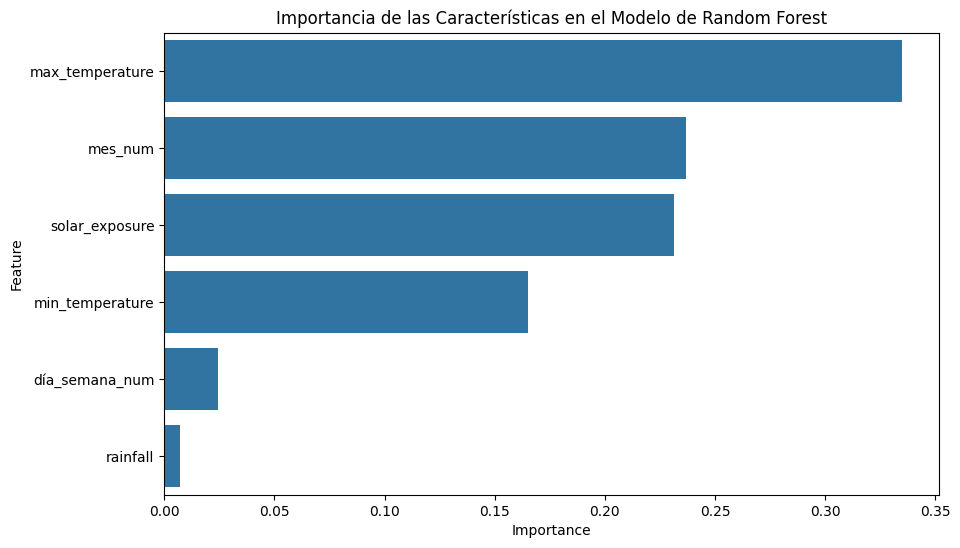

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Asumimos que el dataset ya está cargado y procesado, incluyendo las columnas 'día_semana_num' y 'mes_num'

# Crear una variable binaria para días con precios negativos
data['precio_negativo'] = (data['RRP'] < 0).astype(int)

# Seleccionar características y variable objetivo
features = ['día_semana_num', 'mes_num', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
X = data[features]
y = data['precio_negativo']

# Imputar valores nulos con la media
X = X.fillna(X.mean())

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para la importancia de las características
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Ordenar las características por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotear la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.show()


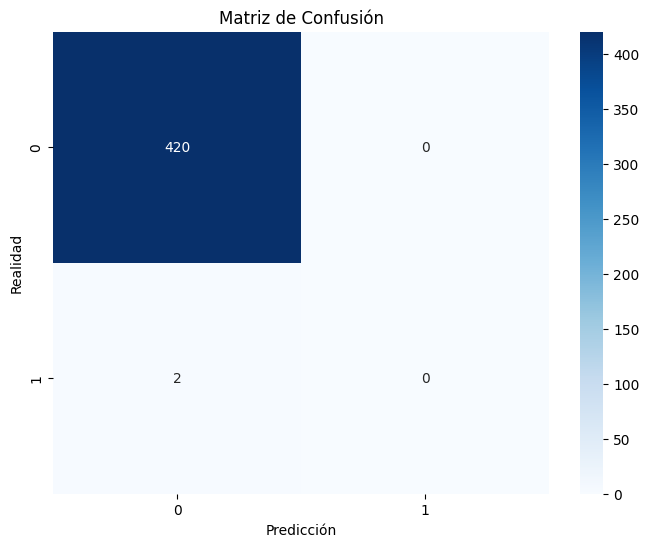

In [27]:
# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

In [30]:
data = pd.read_csv('/content/complete_dataset.csv')
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Crear una variable binaria para días con precios negativos
data['negative_price'] = (data['RRP'] < 0).astype(int)


In [31]:
features = ['day_of_week', 'month', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
X = data[features]
y = data['negative_price']

# Imputar valores nulos con la media
X = X.fillna(X.mean())


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       420
           1       0.00      0.00      0.00         2

    accuracy                           1.00       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.99      1.00      0.99       422



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


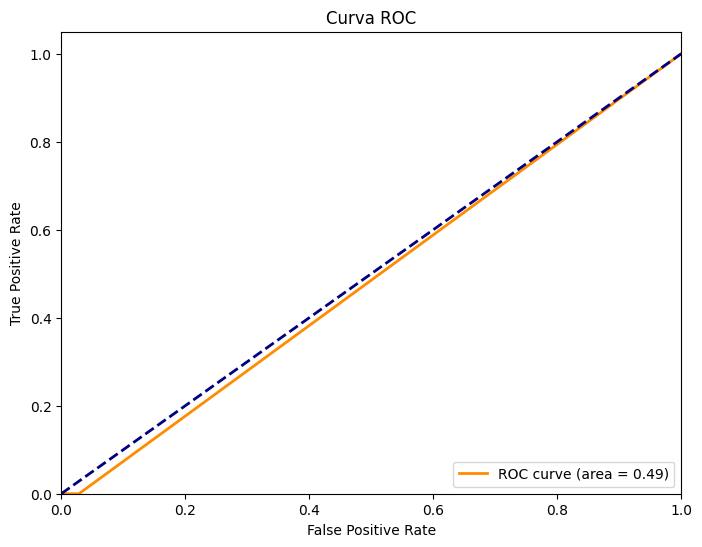

In [34]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [18]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkyf19487/aqz_see3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkyf19487/_3dx_jdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8766', 'data', 'file=/tmp/tmpkyf19487/aqz_see3.json', 'init=/tmp/tmpkyf19487/_3dx_jdn.json', 'output', 'file=/tmp/tmpkyf19487/prophet_modelzfkb37m9/prophet_model-20240812222947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:29:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a

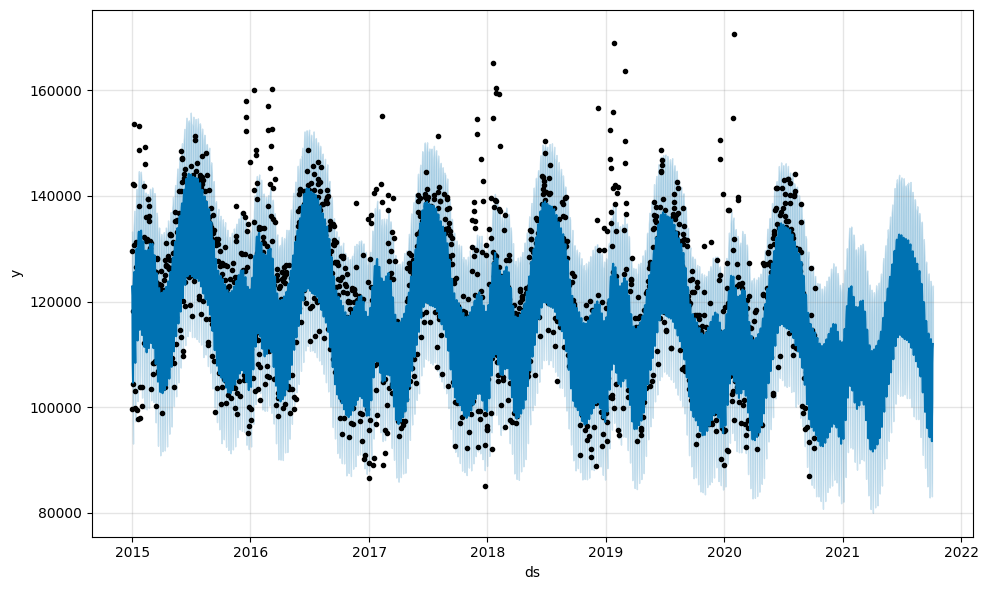

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar los datos
ruta_archivo = '/content/complete_dataset.csv'
data = pd.read_csv(ruta_archivo)

# Convertir la columna 'date' a formato datetime
data['date'] = pd.to_datetime(data['date'])

# Preparar los datos para Prophet
data_prophet = data[['date', 'demand']].rename(columns={'date': 'ds', 'demand': 'y'})

# Crear y entrenar el modelo
model = Prophet()
model.fit(data_prophet)

# Hacer una predicción a futuro
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Visualizar el pronóstico
fig = model.plot(forecast)
plt.show()


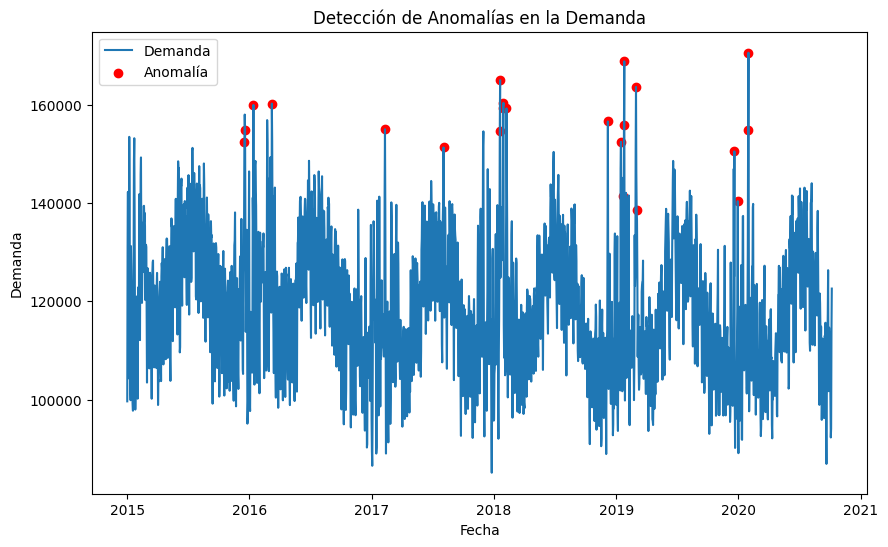

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Suponiendo que ya tienes el dataset cargado y preparado

# Seleccionar las características relevantes para el modelo
features = data[['demand', 'RRP', 'min_temperature', 'max_temperature']]

# Entrenar el modelo de detección de anomalías
model = IsolationForest(contamination=0.01, random_state=42)
data['anomaly'] = model.fit_predict(features)

# Visualizar las anomalías detectadas en la demanda
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['demand'], label='Demanda')
plt.scatter(data[data['anomaly'] == -1]['date'], data[data['anomaly'] == -1]['demand'], color='red', label='Anomalía')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.title('Detección de Anomalías en la Demanda')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


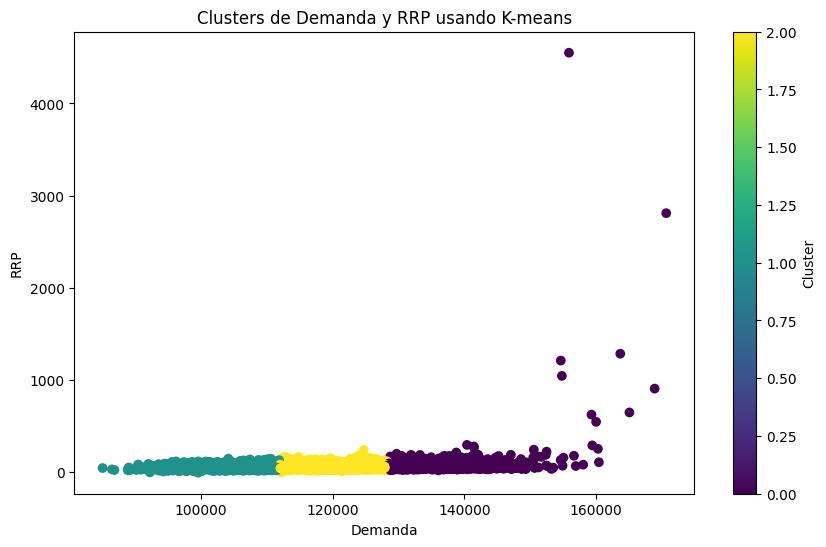

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suponiendo que ya tienes el dataset cargado y preparado

# Seleccionar las características relevantes para el clustering
features = data[['demand', 'RRP']]

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(features)

# Visualizar los clusters en función de la demanda y el RRP
plt.figure(figsize=(10, 6))
plt.scatter(data['demand'], data['RRP'], c=data['cluster'], cmap='viridis')
plt.xlabel('Demanda')
plt.ylabel('RRP')
plt.title('Clusters de Demanda y RRP usando K-means')
plt.colorbar(label='Cluster')
plt.show()
